# Hyperparameter tuning

## Part 1: Manual Hyperparameter Tuning
### Objective
Manually tune hyperparameters of a neural network and observe the impact on model performance.

### Setup
Start with the necessary imports and dataset preparation. We'll use the MNIST dataset for this exercise, as it's complex enough to demonstrate the effects of hyperparameter tuning.

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# We resize to have each image containing array have a sequence of numbers instead of x/y arrays.
# We than normalize the values by dividing.
X_train, X_test = X_train.reshape(-1, 784) / 255.0, X_test.reshape(-1, 784) / 255.0

# one hot encode the ground truth
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [19]:
print(X_train[:3])
print(y_train[:3])
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


## Task: Manual Tuning of Hyperparameters
1. Build a Base Model: Create a simple neural network as a starting point.
2. Manual Tuning: Experiment by manually changing hyperparameters like learning rate, number of layers/neurons, and activation functions.
3. Training and Evaluation: Train the model with different hyperparameter settings and evaluate its performance.

1500/1500 [==============================] - 8s 5ms/step - loss: 12.4391 - accuracy: 0.1030 - val_loss: 0.3360 - val_accuracy: 0.1081


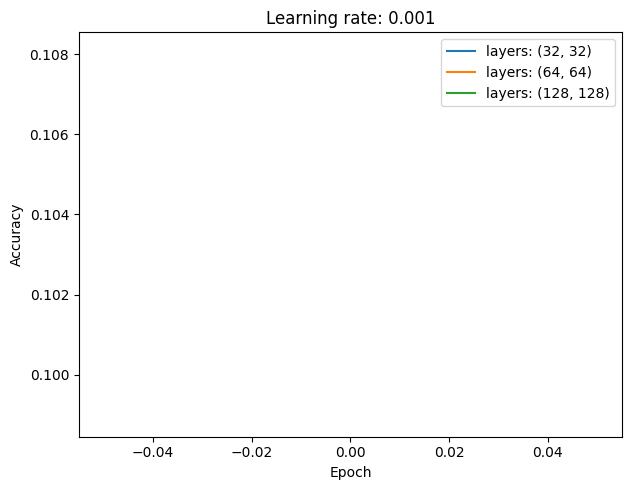

1500/1500 [==============================] - 10s 5ms/step - loss: 19.1949 - accuracy: 0.1014 - val_loss: 0.3356 - val_accuracy: 0.0989


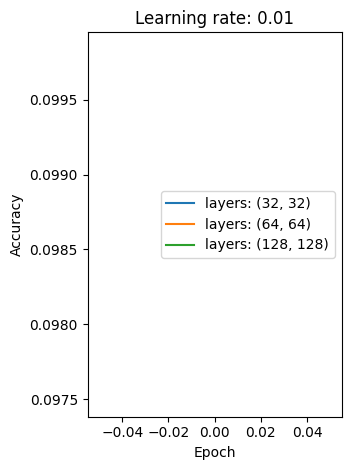

In [34]:
# learn rate
# layers
# neurons
# activation function

def build_model(learning_rate, layers, neurons, activation_function):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(layers[0], activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(layers[0], activation='relu'),
        tf.keras.layers.Dense(10, activation='sigmoid')
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate==learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


# Example hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
layer_configs = [(32, 32), (64, 64), (128, 128)]


plt.figure(figsize=(12, 5))

# Loop through different hyperparameters and train models
for i, lr in enumerate(learning_rates, 1):
    plt.subplot(1, 2, i)
    
    for layers in layer_configs:
        model = build_model(lr, layers)
        
        history = model.fit(X_train, y_train, epochs=3, verbose=1, validation_split=0.2)
        
        #plt.plot(history.history['accuracy'], label=f'lr: {lr}')
        plt.plot(history.history['val_accuracy'], label=f'layers: {layers}')

    plt.title(f'Learning rate: {lr}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.tight_layout()
    plt.show()


## Visualization
Plot the accuracy and loss for different hyperparameter settings.

## Analysis and Questions
* How did different learning rates affect the training process and model accuracy?
* What impact did varying the number of layers and neurons have on the model's performance?
* Were there any combinations of hyperparameters that resulted in particularly good or poor performance?


------------------------------
## Part 2: Automated Hyperparameter Tuning
### Objective
Use automated methods like Grid Search and Random Search for hyperparameter tuning.

### Setup
Reuse the MNIST dataset setup from Part 2.

### Task: Automated Hyperparameter Tuning
1. Grid Search and Random Search: Introduce and apply Grid Search and Random Search using scikit-learn's GridSearchCV or RandomizedSearchCV.
2. Integration with Keras: Show how to use these methods with Keras models.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

# Define a function to create a model (for KerasClassifier)
def create_model_to_search(hyperparams):
    # Create a Keras model with hyperparameters
    pass  # Replace with your code

# Set up GridSearchCV or RandomizedSearchCV
model_to_search = KerasClassifier(build_fn=create_model_to_search)
param_grid = {
    # Define a grid of hyperparameters to search
}
grid = GridSearchCV(estimator=model_to_search, param_grid=param_grid)

# Run grid search
grid_result = grid.fit(X_train, y_train)


## Visualization
Visualize the performance of the best model found by the search methods.
## Analysis and Questions
* Compare the results of manual tuning with automated tuning. Which method gave better results?
* What are the advantages and limitations of using automated methods like Grid Search and Random Search?

